In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
main_data_dir = 'C:/Projects/Medicinal/Dataset/Medicinal Leaf dataset'
batch_size = 32
num_classes = len(os.listdir(main_data_dir))
epochs = 10

In [3]:
# Create label mapping based on subdirectory names
label_mapping = {i: label for i, label in enumerate(sorted(os.listdir(main_data_dir)))}

In [4]:
label_mapping

{0: 'Aloevera',
 1: 'Amla',
 2: 'Amruthaballi',
 3: 'Arali',
 4: 'Astma_weed',
 5: 'Badipala',
 6: 'Balloon_Vine',
 7: 'Bamboo',
 8: 'Beans',
 9: 'Betel',
 10: 'Bhrami',
 11: 'Bringaraja',
 12: 'Caricature',
 13: 'Castor',
 14: 'Catharanthus',
 15: 'Chakte',
 16: 'Chilly',
 17: 'Citron lime (herelikai)',
 18: 'Coffee',
 19: 'Common rue(naagdalli)',
 20: 'Coriender',
 21: 'Curry',
 22: 'Doddpathre',
 23: 'Drumstick',
 24: 'Ekka',
 25: 'Eucalyptus',
 26: 'Ganigale',
 27: 'Ganike',
 28: 'Gasagase',
 29: 'Ginger',
 30: 'Globe Amarnath',
 31: 'Guava',
 32: 'Henna',
 33: 'Hibiscus',
 34: 'Honge',
 35: 'Insulin',
 36: 'Jackfruit',
 37: 'Jasmine',
 38: 'Kambajala',
 39: 'Kasambruga',
 40: 'Kohlrabi',
 41: 'Lantana',
 42: 'Lemon',
 43: 'Lemongrass',
 44: 'Malabar_Nut',
 45: 'Malabar_Spinach',
 46: 'Mango',
 47: 'Marigold',
 48: 'Mint',
 49: 'Neem',
 50: 'Nelavembu',
 51: 'Nerale',
 52: 'Nooni',
 53: 'Onion',
 54: 'Padri',
 55: 'Palak(Spinach)',
 56: 'Papaya',
 57: 'Parijatha',
 58: 'Pea',
 59: 

In [8]:
image_path = 'C:/Users/rachi/Desktop/inputs/testingbetel/b1.jpg'

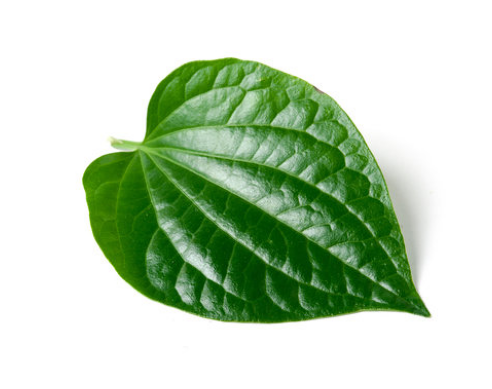

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('plant_identification_model.keras')

# Load and preprocess the image
def preprocess_image(image):
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

# Perform prediction
def process_predictions(predictions):
    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping.get(predicted_label_index, 'Unknown')
    confidence = predictions[0][predicted_label_index]
    
    return predicted_label, confidence

image = load_img(image_path, target_size=(224, 224))
preprocessed_image = preprocess_image(image)
predictions = model.predict(preprocessed_image)

# Provide the path to the image you want to classify
predicted_label, confidence = process_predictions(predictions)

# Print the prediction
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Label: Betel
Confidence: 0.99
